<a href="https://colab.research.google.com/github/bilal17447/DeveloperHub.co-August-Data-Analyst-Intern/blob/main/Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv('/content/credit_risk_dataset[1].csv')

In [7]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
df.shape

(32581, 12)

In [9]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [13]:
df.duplicated().sum()

np.int64(165)

In [11]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [19]:
df=df.dropna()

In [20]:
df=df.drop_duplicates()

In [21]:
df.shape
df.duplicated().sum()

np.int64(0)

In [22]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [28]:
df['person_home_ownership'].unique()
df['loan_intent'].unique()
df['loan_grade'].unique()
df['cb_person_default_on_file'].unique()

array([1, 0])

In [29]:
df['person_home_ownership'] = df['person_home_ownership'].map({'RENT': 1, 'OWN': 2,'MORTGAGE':3,'OTHER':4})
df['loan_intent'] = df['loan_intent'].map({'PERSONAL': 1, 'EDUCATION': 2,'MEDICAL':3,'VENTURE':4,'HOMEIMPROVEMENT':5,'DEBTCONSOLIDATION':6,})
df['loan_grade'] = df['loan_grade'].map({'A': 1, 'B': 2,'C':3,'D':4,'E':5,'F':6,'G':7})
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0,})

In [30]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,NaN,123.0,NaN,NaN,35000,16.02,1,0.59,NaN,3
1,21,9600,NaN,5.0,NaN,NaN,1000,11.14,0,0.10,NaN,2
2,25,9600,NaN,1.0,NaN,NaN,5500,12.87,1,0.57,NaN,3
3,23,65500,NaN,4.0,NaN,NaN,35000,15.23,1,0.53,NaN,2
4,24,54400,NaN,8.0,NaN,NaN,35000,14.27,1,0.55,NaN,4


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [34]:
df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'].fillna(df['loan_int_rate'].median())

,loan_int_rate
0,16.02
1,11.14
2,12.87
3,15.23
4,14.27
...,...
32576,13.16
32577,7.49
32578,10.99
32579,11.48


In [57]:
le = LabelEncoder()
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [47]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [74]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

In [77]:
y_pred = model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8216102438168742


In [82]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[3895  546]
 [ 471  789]]


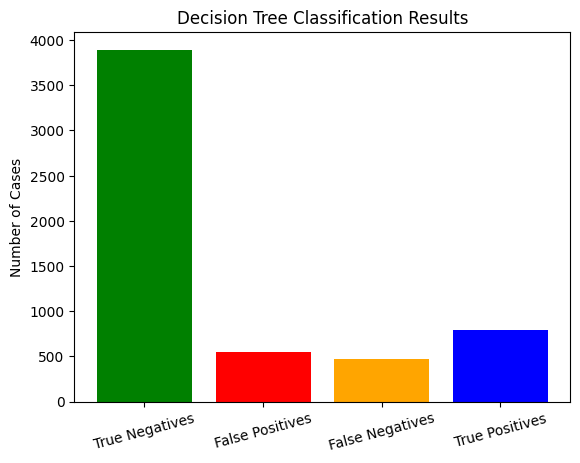

In [83]:
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
values = [cm[0,0], cm[0,1], cm[1,0], cm[1,1]]
plt.bar(labels, values, color=['green', 'red', 'orange', 'blue'])
plt.title("Decision Tree Classification Results")
plt.ylabel("Number of Cases")
plt.xticks(rotation=15)
plt.show()

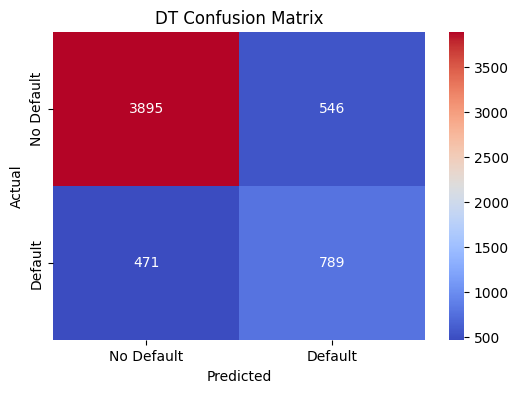

In [86]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DT Confusion Matrix")
plt.show()